# **MNIST classification with keras model**

import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_keras_tf'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [3]:
import tensorflow as tf
import keras
from keras.datasets import mnist

# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [4]:
### configurations
batch_size = 100
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Create, configure and train the model

In [7]:
# create the model
model = Sequential()

# model taken from keras documentation
# adding layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# last layer wiht outputs = number of classes
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# Configure the model for training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [10]:
# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/8





60000/60000 [==============================] - 19s 321us/step - loss: 0.2484 - acc: 0.9251 - val_loss: 0.0543 - val_acc: 0.9809
Epoch 2/8
60000/60000 [==============================] - 11s 179us/step - loss: 0.0850 - acc: 0.9744 - val_loss: 0.0387 - val_acc: 0.9879
Epoch 3/8
60000/60000 [==============================] - 10s 174us/step - loss: 0.0635 - acc: 0.9812 - val_loss: 0.0358 - val_acc: 0.9885
Epoch 4/8
60000/60000 [==============================] - 10s 173us/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.0337 - val_acc: 0.9893
Epoch 5/8
60000/60000 [==============================] - 10s 175us/step - loss: 0.0467 - acc: 0.9860 - val_loss: 0.0274 - val_acc: 0.9904
Epoch 6/8
60000/60000 [==============================] - 11s 175us/step - loss: 0.0416 - acc: 0.9873 - val_loss: 0.0282 - val_acc: 0.9899
Epoch 7/8
60000/6000

Metrics

In [11]:
# show the loss and accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02989833598978985
Test accuracy: 0.9904


Predictions 

1413
prediction:  4
real value:  4


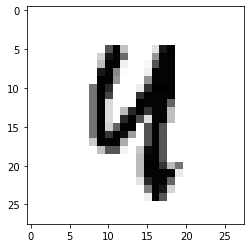

In [12]:
i=randint(1, x_test.shape[0])
print(i)
plt.imshow(x_test[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", model.predict_classes(x_test[i].reshape((1,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))